# Goal: Highest Accuracy

## Steps:

- look at the data and features
- clean up messy data
- prepare the data for classification machine learning models
- train the models
- tune the models for highest accuracy

### Complexity is the enemy of execution.
### Be simple, be quick.

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for tuning the model
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines
from sklearn.pipeline import Pipeline

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# import the data
train_set = pd.read_csv("Train_set.csv")
test_set = pd.read_csv("Test_set.csv")
data_dictionary = pd.read_csv("Data_Dictionary.csv", header=None)
sample_submission = pd.read_csv("Sample_Submission.csv")

<IPython.core.display.Javascript object>

In [3]:
# make copies of the train and test sets
train = train_set.copy()
test = test_set.copy()

# display the Data Dictionary
data_dictionary

,0,1
0,ID,unique ID assigned to each applicant
1,loan_amnt,loan amount ($) applied each applicant
2,loan_term,Loan duration in years
3,interest_rate,Applicable interest rate on Loan in %
4,loan_grade,Loan Grade Assigned by the bank
5,loan_subgrade,Loan SubGrade Assigned by the bank
6,job_experience,Number of years job experience
7,home_ownership,Status of House Ownership
8,annual_income,Annual income of the applicant
9,income_verification_status,Status of Income verification by the bank


<IPython.core.display.Javascript object>

22 Features and 1 Target Variable

In [4]:
# Check the shape
train.shape

(93174, 23)

<IPython.core.display.Javascript object>

In [5]:
test.shape

(39933, 22)

<IPython.core.display.Javascript object>

# 93,174 rows in the training set
# 39,933 rows in the test set

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

<IPython.core.display.Javascript object>

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

<IPython.core.display.Javascript object>

## Missing values and object columns will need to be treated

In [8]:
# Check a sample of 20 rows
train.sample(n=20, random_state=420)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
27972,37597260,8600,3 years,12.990,C,C2,<5 Years,RENT,43000.000,Not Verified,debt_consolidation,AZ,12.150,0.000,0.000,9958,12.000,929.020,INDIVIDUAL,48.000,14209.000,24000.000,1
63334,61140941,9600,3 years,5.320,A,A1,10+ years,OWN,87927.000,Source Verified,credit_card,GA,5.080,0.000,2.000,11851,9.000,196.150,INDIVIDUAL,22.000,11851.000,28200.000,0
41198,44327275,6450,3 years,11.530,B,B5,10+ years,OWN,13000.000,Verified,debt_consolidation,MT,29.180,0.000,0.000,9799,16.000,548.700,INDIVIDUAL,44.000,9799.000,19100.000,0
1290,49724421,15000,3 years,8.180,B,B1,10+ years,MORTGAGE,53000.000,Not Verified,debt_consolidation,OK,24.180,2.000,0.000,15335,42.000,739.770,INDIVIDUAL,35.000,79559.000,23800.000,0
3950,53352564,30000,3 years,7.260,A,A4,NaN,MORTGAGE,94000.000,Verified,credit_card,NY,20.500,0.000,0.000,90109,18.000,1144.200,INDIVIDUAL,31.000,282473.000,112800.000,0
65797,48024227,20000,5 years,7.890,A,A5,<5 Years,RENT,48000.000,Source Verified,debt_consolidation,VA,17.130,0.000,0.000,7824,14.000,1100.350,INDIVIDUAL,39.000,16707.000,30900.000,0
63598,15559415,17000,3 years,11.990,B,B3,10+ years,MORTGAGE,75000.000,Source Verified,debt_consolidation,TX,18.960,0.000,0.000,18428,38.000,2100.550,INDIVIDUAL,65.000,169255.000,24600.000,1
72264,43285230,11000,3 years,11.990,B,B5,<5 Years,RENT,30000.000,Source Verified,credit_card,NY,28.390,0.000,1.000,12460,15.000,1049.700,INDIVIDUAL,52.000,25116.000,17700.000,0
2165,43835427,5000,3 years,11.530,B,B5,6-10 years,MORTGAGE,69000.000,Verified,debt_consolidation,PA,26.560,0.000,0.000,28533,30.000,422.140,INDIVIDUAL,48.000,250577.000,72600.000,0
10730,59744003,9675,3 years,15.610,D,D1,NaN,RENT,22000.000,Verified,debt_consolidation,CT,25.040,0.000,0.000,11293,10.000,592.890,INDIVIDUAL,22.000,13572.000,14600.000,0


<IPython.core.display.Javascript object>

In [9]:
# Check for duplicate rows
train.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [10]:
# Check how many columns have missing data
train.isnull().any().sum()

8

<IPython.core.display.Javascript object>

In [11]:
# Check how many rows have missing data
train.isnull().any(axis=1).sum()

13653

<IPython.core.display.Javascript object>

## 8 columns have missing data
## 13,653 rows have missing data

In [12]:
# Which columns?
train.columns[train.isnull().any()].tolist()

['job_experience',
 'annual_income',
 'delinq_2yrs',
 'public_records',
 'total_acc',
 'last_week_pay',
 'total_current_balance',
 'total_revolving_limit']

<IPython.core.display.Javascript object>

In [13]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,93174.000,NaN,NaN,NaN,35050211.389,24149262.074,70735.000,10859832.500,37107507.000,58598949.500,73519746.000
loan_amnt,93174.000,NaN,NaN,NaN,14733.861,8428.185,500.000,8000.000,13000.000,20000.000,35000.000
loan_term,93174,2,3 years,65211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
interest_rate,93174.000,NaN,NaN,NaN,13.233,4.369,5.320,9.990,12.990,16.200,28.990
loan_grade,93174,7,B,26865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_subgrade,93174,35,B3,5879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_experience,88472,3,<5 Years,40610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,93174,5,MORTGAGE,46445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_income,93173.000,NaN,NaN,NaN,75028.259,69454.784,1200.000,45000.000,64000.000,90000.000,9500000.000
income_verification_status,93174,3,Source Verified,34487,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [14]:
# Look at all the objects and their unique values (discrete variables)

num_to_display = 50
for colname in train.dtypes[train.dtypes == "object"].index:
    val_counts = train[colname].value_counts(dropna=False)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n")

3 years    65211
5 years    27963
Name: loan_term, dtype: int64


B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: loan_grade, dtype: int64


B3    5879
B4    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: loan_subgrade, dtype: int64


<5 Years      40610
10+ years     30362
6-10 years    17500
NaN            4702
Name: job_experience, dtype: int64


MORTGAGE    46445
RENT        37449
OWN          9254
OTHER          18
NONE            8
Name: home_ownership, dtype: int64


Source Verified    34487
Verified           30450
Not Verified       28237
Name: income_verification_status, dtype: int64


debt_consolidation    55241
credit_

<IPython.core.display.Javascript object>

37107507.0


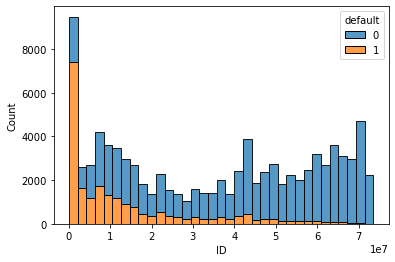

13000.0


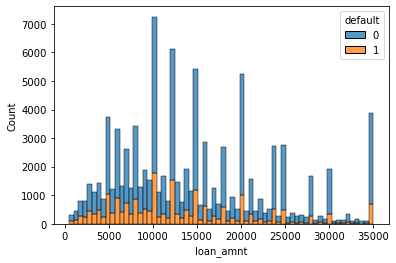

12.99


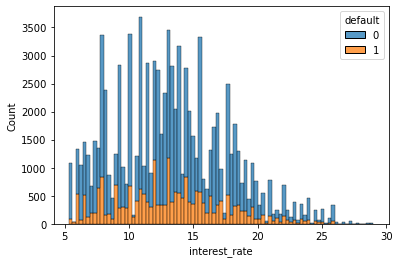

64000.0


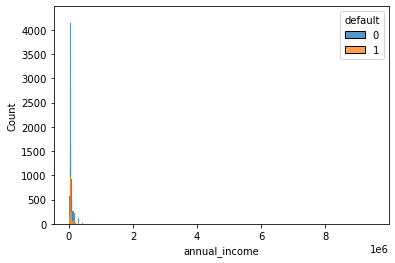

17.64


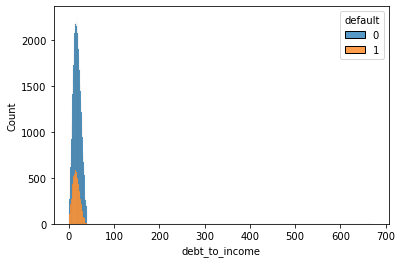

0.0


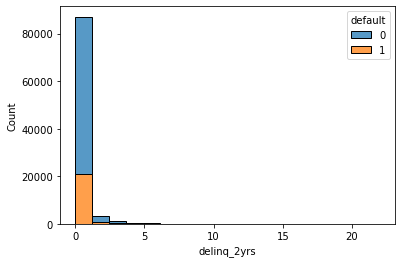

0.0


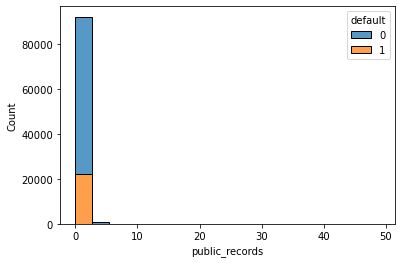

11856.0


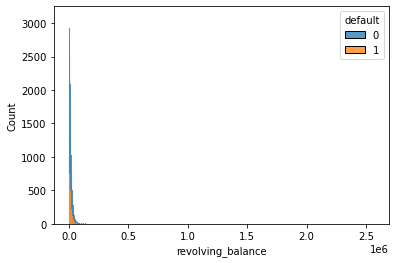

24.0


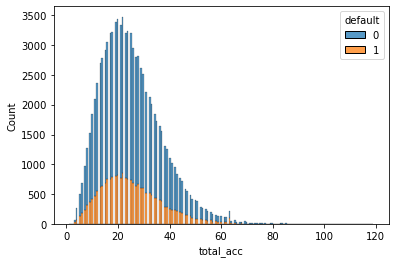

1070.755


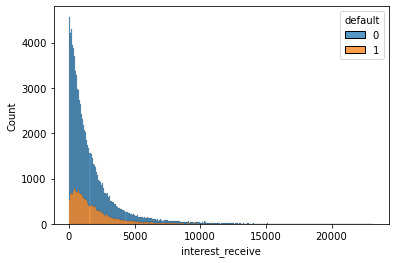

48.0


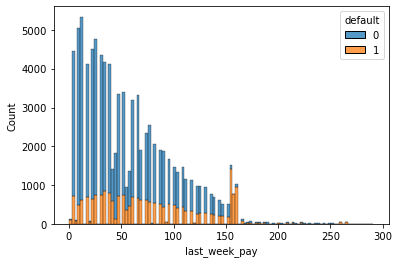

79363.5


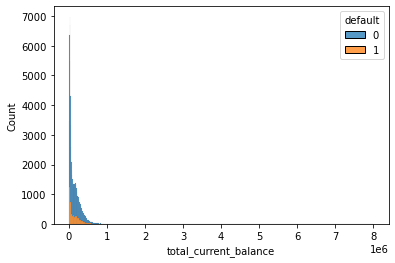

23700.0


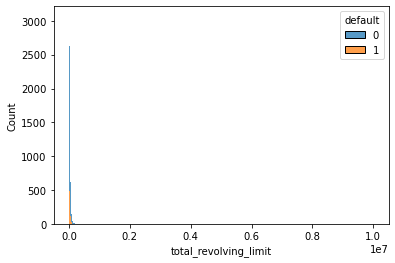

0.0


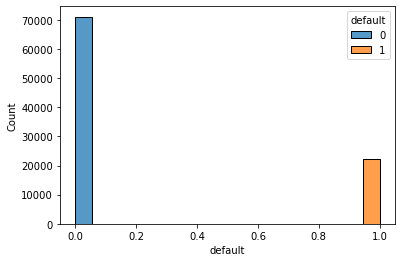

<IPython.core.display.Javascript object>

In [15]:
# Look at a histogram of each numeric variable, print median
for i in train_set.select_dtypes(["number"]).columns:
    print(train_set[i].median())
    sns.histplot(data=train_set, x=i, hue="default", multiple="stack")
    plt.show()

73519746


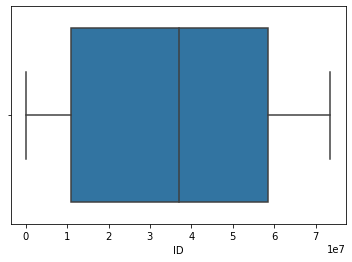

35000


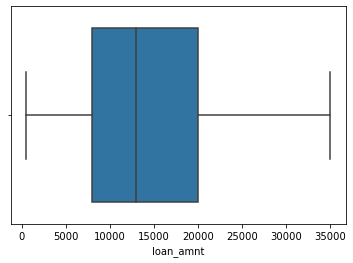

28.99


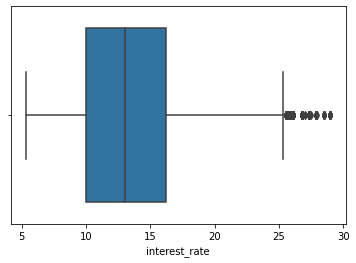

9500000.0


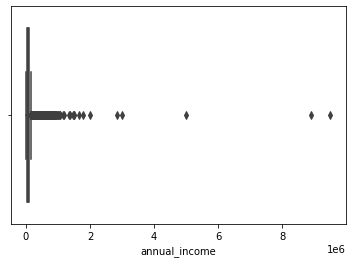

672.52


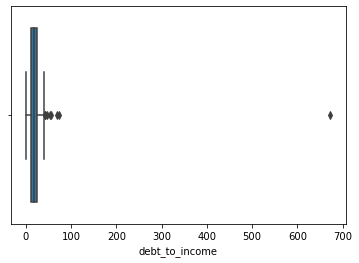

22.0


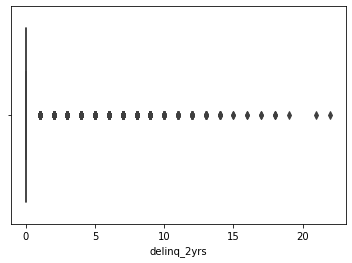

49.0


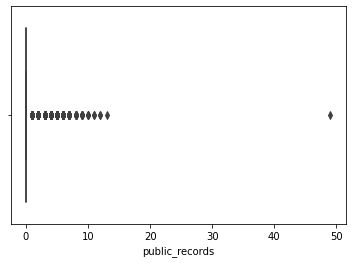

2560703


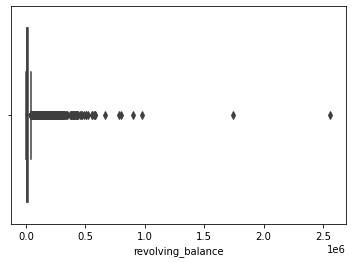

119.0


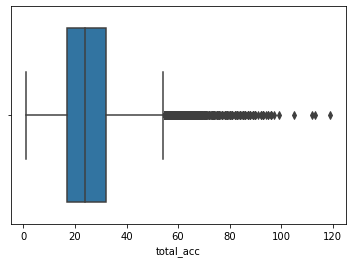

23172.31


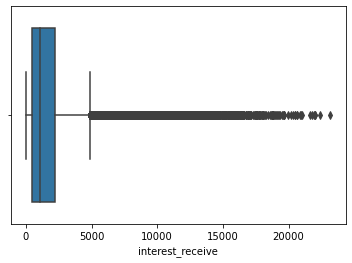

291.0


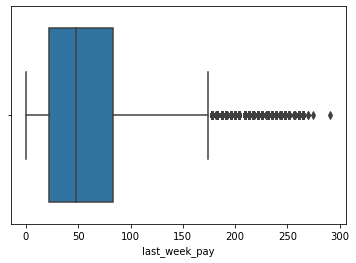

8000078.0


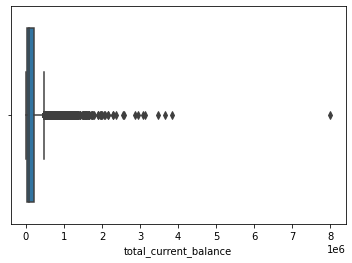

9999999.0


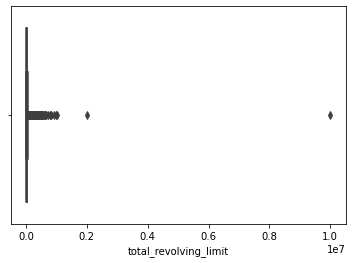

1


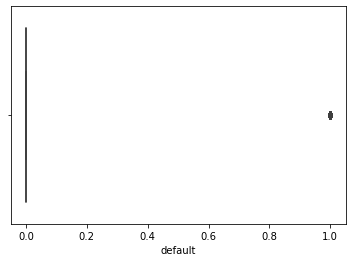

<IPython.core.display.Javascript object>

In [16]:
# Look at a boxplot of each numeric variable to see outliers
for i in train.select_dtypes(["number"]).columns:
    print(train[i].max())
    sns.boxplot(data=train, x=i)
    plt.show()

# Next Steps

Convert objects to numbers.

Split the features and targets into X and y and create a validation set.

Missing values will be imputed to median

Outliers will be left alone for now.


In [17]:
# Convert loan_term to number type
train["loan_term"] = train["loan_term"].str.extract("(\d+)").astype("int64")
test["loan_term"] = test["loan_term"].str.extract("(\d+)").astype("int64")

<IPython.core.display.Javascript object>

In [18]:
# Drop loan_grade
train = train.drop(["loan_grade"], axis=1)
test = test.drop(["loan_grade"], axis=1)

<IPython.core.display.Javascript object>

In [19]:
# Convert loan_subgrade to number type
gradevalues = {
    "A1": 10.0,
    "A2": 9.9,
    "A3": 9.8,
    "A4": 9.7,
    "A5": 9.6,
    "B1": 9.0,
    "B2": 8.9,
    "B3": 8.8,
    "B4": 8.7,
    "B5": 8.6,
    "C1": 8.0,
    "C2": 7.9,
    "C3": 7.8,
    "C4": 7.7,
    "C5": 7.6,
    "D1": 7.0,
    "D2": 6.9,
    "D3": 6.8,
    "D4": 6.7,
    "D5": 6.6,
    "E1": 6.0,
    "E2": 5.9,
    "E3": 5.8,
    "E4": 5.7,
    "E5": 5.6,
    "F1": 5.0,
    "F2": 4.9,
    "F3": 4.8,
    "F4": 4.7,
    "F5": 4.6,
    "G1": 4.0,
    "G2": 3.9,
    "G3": 3.8,
    "G4": 3.7,
    "G5": 3.6,
}

train.replace({"loan_subgrade": gradevalues}, inplace=True)
train["loan_subgrade"] = train["loan_subgrade"].astype("float64")

test.replace({"loan_subgrade": gradevalues}, inplace=True)
test["loan_subgrade"] = test["loan_subgrade"].astype("float64")

<IPython.core.display.Javascript object>

In [20]:
# Fix job_experience

expvalues = {
    "<5 Years": 1,
    "6-10 years": 2,
    "10+ years": 3,
    np.nan: 0,
}

train.replace({"job_experience": expvalues}, inplace=True)
train["job_experience"] = train["job_experience"].astype("int64")

test.replace({"job_experience": expvalues}, inplace=True)
test["job_experience"] = test["job_experience"].astype("int64")

<IPython.core.display.Javascript object>

In [21]:
# Change remaining objects to dummies and drop first

train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

<IPython.core.display.Javascript object>

# Steps I did for tidying up object columns

1. `loan_term` drop the "years" string and convert to int
2. Drop `loan_grade`
3. Change `loan_subgrade` so that A1 = 10.0, A2 = 9.9, A3 = 9.8, A4 = 9.7, A5 = 9.6, B1 = 9.0, B2 = 8.9, ???
4. `job_experience` can be changed to 0,1,2,3 categories
    - NaNs to treat
    
    
5. `home_ownership` converted to 4 dummies
6. `income_verification_status` to 2 dummies
7. `loan_purpose` to 3 dummies
8. `state_code` to dummies
9. `application_type` to 1 dummy

In [22]:
# Divide data into X and y

X = train.drop(["default"], axis=1)
y = train["default"]

X_test = test

<IPython.core.display.Javascript object>

In [23]:
# Split the training data into training and validation datasets

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Check the shape of all 3 datasets
print(X_train.shape, X_val.shape, X_test.shape)

(74539, 75) (18635, 75) (39933, 75)


<IPython.core.display.Javascript object>

# Data is split into train, validation, and test
# Now to impute remaining missing values

In [24]:
# Impute the median for missing values

# We use .fit_transform() on the training set to find the median (on JUST the training set)
# We then use .transform() to apply that same median value to the validation and test sets
# This is to prevent data leakage

imputer = SimpleImputer(strategy="median")

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)

X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

<IPython.core.display.Javascript object>

In [25]:
# Verify missing values have been imputed

print("Training nulls: ", X_train.isnull().any(axis=1).sum())
print("Validation nulls: ", X_val.isnull().any(axis=1).sum())
print("Testing nulls: ", X_test.isnull().any(axis=1).sum())


Training nulls:  0
Validation nulls:  0
Testing nulls:  0


<IPython.core.display.Javascript object>

# Initial Model Building

In [26]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [27]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

<IPython.core.display.Javascript object>

In [28]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = accuracy_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

dtree: 0.8718388738737547
Logistic regression: 0.8198525779788179
Bagging: 0.8990863431983243
Random forest: 0.8744549351493974
GBM: 0.8912783639208832
Adaboost: 0.8590133813995218
Xgboost: 0.9076992675219578

Validation Performance:

dtree: 0.8696002146498524
Logistic regression: 0.8108398175476255
Bagging: 0.8979876576334854
Random forest: 0.8707271263751006
GBM: 0.8851623289508989
Adaboost: 0.8537697880332707
Xgboost: 0.905232090152938


<IPython.core.display.Javascript object>

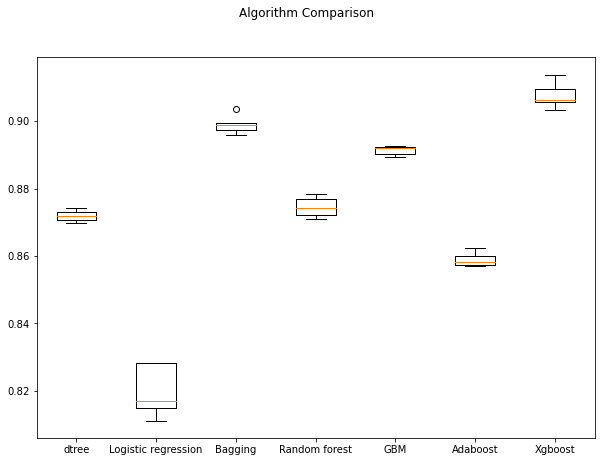

<IPython.core.display.Javascript object>

In [29]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

# Default models and their accuracy scores

### XGBoost and Bagging were the highest

# Next, Oversample

In [30]:
print(
    "Before OverSampling, counts of label '1' or 'default': {}".format(
        sum(y_train == 1)
    )
)
print(
    "Before OverSampling, counts of label '0' or 'no default': {}".format(
        sum(y_train == 0)
    )
)
print("Before OverSampling, the original shape of X_train: {}".format(X_train.shape))
print()

# Synthetic Minority Over Sampling Technique (SMOTE)
# This function selects a random observation in the minority class, then creates a synthetic,
# random observation between it and its 5 nearest neighbors

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=420)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over == 0)))
print("After OverSampling, the new shape of X_train: {}".format(X_train_over.shape))

Before OverSampling, counts of label '1' or 'default': 17703
Before OverSampling, counts of label '0' or 'no default': 56836
Before OverSampling, the original shape of X_train: (74539, 75)

After OverSampling, counts of label '1': 56836
After OverSampling, counts of label '0': 56836
After OverSampling, the new shape of X_train: (113672, 75)


<IPython.core.display.Javascript object>

In [31]:
# Create 7 default models using oversampled data and save cross-validated recall scores to results2

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost with OverSampled Dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance on OverSampled Dataset:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = accuracy_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost with OverSampled Dataset:

dtree: 0.9114117758069057
Logistic regression: 0.7489267027938398
Bagging: 0.9347068430797046
Random forest: 0.9261559510340074
GBM: 0.9274667305295313
Adaboost: 0.9013389183931533
Xgboost: 0.9399412217089085

Validation Performance on OverSampled Dataset:

dtree: 0.8715320633217065
Logistic regression: 0.7493426348269385
Bagging: 0.8978266702441642
Random forest: 0.8752347732760933
GBM: 0.8880064394955729
Adaboost: 0.85870673463912
Xgboost: 0.9059833646364368


<IPython.core.display.Javascript object>

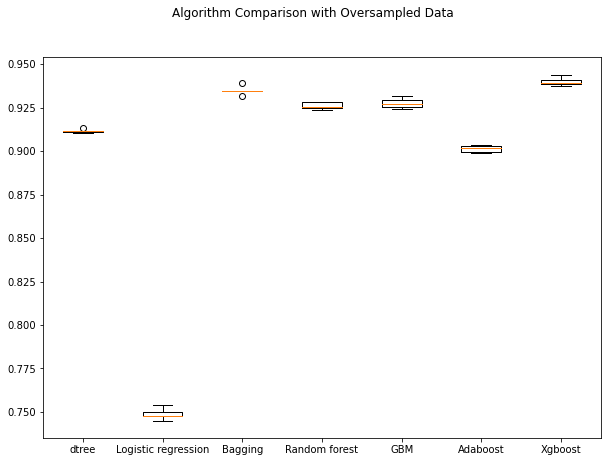

<IPython.core.display.Javascript object>

In [32]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison with Oversampled Data")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

# Next: Undersample

In [33]:
print(
    "Before UnderSampling, counts of label '1' or 'Failure': {}".format(
        sum(y_train == 1)
    )
)
print(
    "Before UnderSampling, counts of label '0' or 'No Failure': {}".format(
        sum(y_train == 0)
    )
)
print("Before UnderSampling, the original shape of X_train: {}".format(X_train.shape))
print()

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_under == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_under == 0)))
print("After UnderSampling, the new shape of X_train: {}".format(X_train_under.shape))

Before UnderSampling, counts of label '1' or 'Failure': 17703
Before UnderSampling, counts of label '0' or 'No Failure': 56836
Before UnderSampling, the original shape of X_train: (74539, 75)

After UnderSampling, counts of label '1': 17703
After UnderSampling, counts of label '0': 17703
After UnderSampling, the new shape of X_train: (35406, 75)


<IPython.core.display.Javascript object>

In [34]:
# Create 7 default models using undersampled data and save cross-validated recall scores to results3

results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost with UnderSampled Dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance on UnderSampled Dataset:" "\n")

for name, model in models:
    model.fit(X_train_under, y_train_under)
    scores = accuracy_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost with UnderSampled Dataset:

dtree: 0.8599388820714641
Logistic regression: 0.753233697408943
Bagging: 0.9068801201061458
Random forest: 0.8636669337314006
GBM: 0.8944810086982754
Adaboost: 0.8388971349839341
Xgboost: 0.911653201959127

Validation Performance on UnderSampled Dataset:

dtree: 0.8576871478400858
Logistic regression: 0.7494499597531527
Bagging: 0.8989535819694124
Random forest: 0.8662731419372149
GBM: 0.8977730077810572
Adaboost: 0.8440032197477865
Xgboost: 0.9016903675878722


<IPython.core.display.Javascript object>

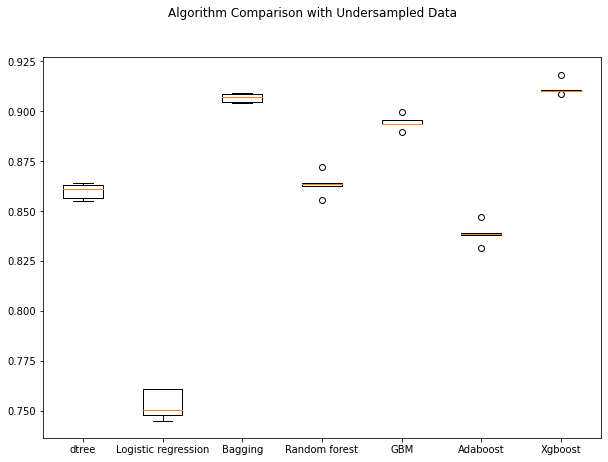

<IPython.core.display.Javascript object>

In [35]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison with Undersampled Data")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

## Next: Try hyperparameter tuning on XGBoost with undersampled data

In [36]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_under, y_train_under)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9068519153901594:


<IPython.core.display.Javascript object>

In [41]:
# Creating new pipeline with best parameters
tuned_x_under = XGBClassifier(
    random_state=1,
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=250,
    learning_rate=0.1,
    gamma=3,
    eval_metric="logloss",
)

tuned_x_under.fit(X_train_under, y_train_under)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [42]:
x_under_val_perf = model_performance_classification_sklearn(tuned_x_under, X_val, y_val)
x_under_val_perf

,Accuracy,Recall,Precision,F1
0,0.872,0.955,0.658,0.779


<IPython.core.display.Javascript object>

# Next: Hyperparameter Tuning for XGBoost and Oversampled Data

In [39]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9334139969607482:


<IPython.core.display.Javascript object>

In [43]:
# Creating new pipeline with best parameters
tuned_x_over = XGBClassifier(
    random_state=1,
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=250,
    learning_rate=0.1,
    gamma=3,
    eval_metric="logloss",
)

tuned_x_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [44]:
x_over_val_perf = model_performance_classification_sklearn(tuned_x_over, X_val, y_val)
x_over_val_perf

,Accuracy,Recall,Precision,F1
0,0.905,0.925,0.740,0.822


<IPython.core.display.Javascript object>

In [51]:
sample_submission

,ID,default
0,4855329,1
1,66862420,0
2,3637416,0
3,53682249,1
4,53937165,0
...,...,...
39928,57779318,1
39929,59742362,1
39930,72657145,1
39931,15220189,1


<IPython.core.display.Javascript object>

In [50]:
mypred = pd.DataFrame()

mypred["ID"] = test_set["ID"]

mypred["default"] = tuned_x_over.predict(X_test)

mypred

,ID,default
0,4855329,1
1,66862420,0
2,3637416,1
3,53682249,0
4,53937165,0
...,...,...
39928,57779318,0
39929,59742362,0
39930,72657145,0
39931,15220189,0


<IPython.core.display.Javascript object>

In [53]:
# Save predictions on hyper-tuned xgboost on oversampled data
mypred.to_csv("submit0.csv", index=False)

<IPython.core.display.Javascript object>

# Submission Accuracy: 0.903889

In [54]:
# Create predictions on hyper-tuned xgboost on undersampled data
mypred["default"] = tuned_x_under.predict(X_test)
mypred.to_csv("submit1.csv", index=False)

<IPython.core.display.Javascript object>

# Submission Accuracy: .8744146

In [63]:
test

,ID,loan_amnt,loan_term,interest_rate,loan_subgrade,job_experience,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,income_verification_status_Source Verified,income_verification_status_Verified,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_other,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_DE,state_code_FL,state_code_GA,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,application_type_JOINT
0,4855329,12000,3,15.310,7.900,1,73400.000,14.620,0.000,0.000,22156,30.000,2290.240,87.000,128098.000,25800.000,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,66862420,12000,3,7.260,9.700,3,105000.000,11.380,0.000,0.000,7592,14.000,202.680,13.000,269396.000,23600.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3637416,15000,3,14.330,8.000,2,50000.000,28.150,0.000,1.000,17983,19.000,1166.240,30.000,220135.000,34100.000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,53682249,12000,3,9.990,8.800,2,37000.000,34.320,0.000,0.000,12262,18.000,635.060,35.000,39436.000,21700.000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,53937165,20150,3,11.530,8.600,1,75000.000,26.740,1.000,0.000,8251,11.000,1232.840,31.000,52764.000,12000.000,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39928,57779318,5000,3,8.180,9.000,3,65000.000,13.090,0.000,5.000,6731,24.000,187.270,26.000,14422.000,26100.000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39929,59742362,1800,3,11.530,8.600,2,55000.000,25.440,0.000,1.000,11092,38.000,81.240,26.000,243469.000,29200.000,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39930,72657145,15200,3,13.440,7.800,3,78000.000,19.400,0.000,0.000,19688,26.000,0.000,NaN,145370.000,45400.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
39931,15220189,14425,5,18.920,6.700,1,38000.000,17.400,0.000,1.000,10805,29.000,4268.800,96.000,106449.000,19700.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

### NEXT: We will train the best hyperparameters of the xgboost on the entire original dataset (before split)

In [71]:
X_test2 = test
X2 = X
y2 = y

<IPython.core.display.Javascript object>

In [73]:
imputer = SimpleImputer(strategy="median")

X2 = pd.DataFrame(imputer.fit_transform(X2), columns=X2.columns)

X_test2 = pd.DataFrame(imputer.transform(X_test2), columns=X_test2.columns)

<IPython.core.display.Javascript object>

In [75]:
# Creating new pipeline with best parameters
tuned_x_all = XGBClassifier(
    random_state=1,
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=250,
    learning_rate=0.1,
    gamma=3,
    eval_metric="logloss",
)

tuned_x_all.fit(X2, y2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [76]:
mypred["default"] = tuned_x_all.predict(X_test2)
mypred.to_csv("submit2.csv", index=False)

<IPython.core.display.Javascript object>

# Submission Accuracy: 0.9047154